In [11]:
import pandas as pd
import numpy as np
import os
from acquire import get_hwyrail, get_equiprail
from prepare import prep_hwy_df
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats

In [2]:
df = get_hwyrail()

In [3]:
df.shape

(18995, 104)

In [4]:
df = prep_hwy_df(df)

In [5]:
df.shape

(12181, 48)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 0312RS009 to 193825
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state               12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64 

In [15]:
df.state.value_counts()

48    1631
13     751
18     727
6      698
1      583
17     518
39     516
22     492
45     361
37     359
21     355
42     352
12     344
29     343
47     342
5      307
40     293
20     277
51     275
31     274
28     216
53     199
27     182
8      165
26     157
4      152
54     150
19     138
24     121
36     119
38     113
16     108
55      89
41      79
35      72
30      62
46      54
34      51
49      38
56      37
10      29
25      16
32      15
50       8
9        5
23       4
33       2
11       2
Name: state, dtype: int64

## Takeaway

 - states like Texas, Georgia, Indiana, Alabama, Ohio rank highest in hwy rail accidents while states in the NE like Vermont, Conneticut & DC are at the very bottom.
     - is this because people in NE are more accustomed to trains and people in middle america don't see them as often?
     - Need to look at state populations and compare average accident (i.e., vermont could have 5 people but 2 accidents while Texas could have 28 million people and 1,000 accidents. need to look at the numbers and compare

Initial hypothesis

 - Rail accidents are more prevelant in southern and middle america
     

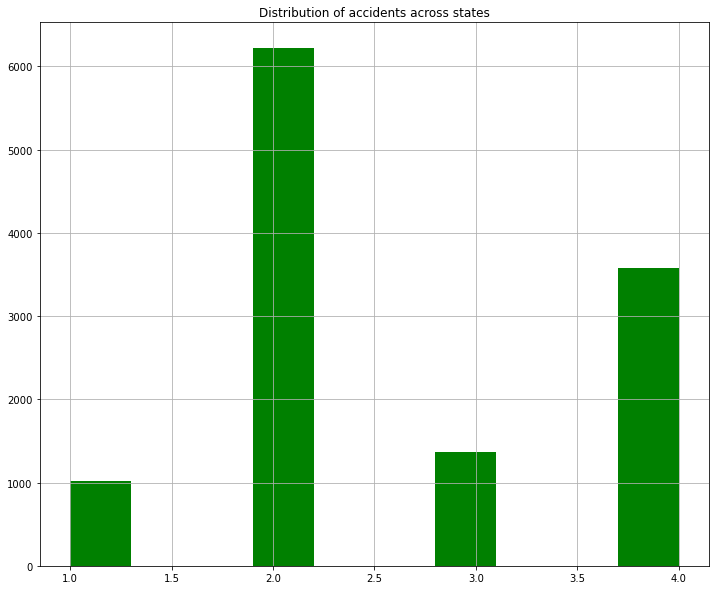

In [18]:
df['visibility'].hist(color='green', figsize=(12, 10))

plt.title('Distribution of Accident Based On Visbility')
plt.show()

----
## Takeaway

Majority of accident happen the day followed by night...not many at dawn or dusk

In [25]:
df.weather = df.weather.astype(int)

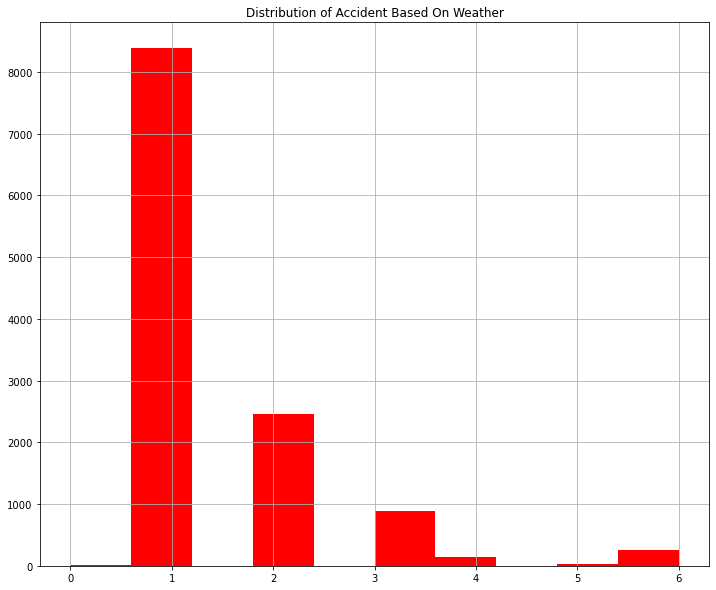

In [27]:
df['weather'].hist(color='red', figsize=(12, 10))

plt.title('Distribution of Accident Based On Weather')
plt.show()

-----

## Takeaway

- Clear weather followed by cloudy skies are when the majority of accidents take place

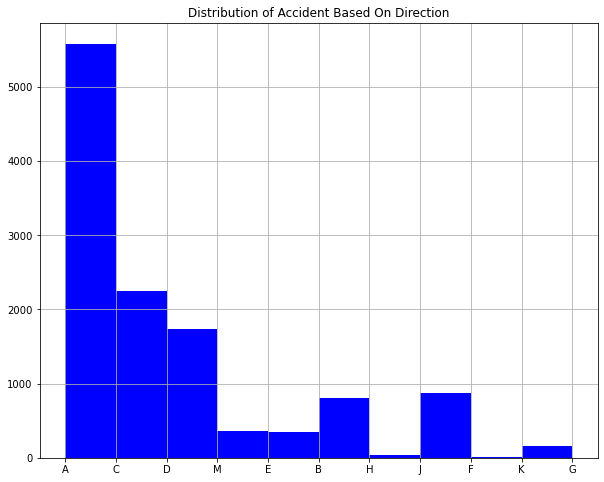

In [31]:
df['vehicle_type'].hist(color='blue', figsize=(10,8))

plt.title('Distribution of Accident Based On Vehicle Type')
plt.show()

In [32]:
df.vehicle_type.value_counts()

A    5585
C    2248
D    1731
J     878
B     804
M     366
E     352
K     156
H      39
F      17
G       5
Name: vehicle_type, dtype: int64

-----
## Takeway
 
 - most accidents are involved with auto(cars) followed by tractor trailers, then pick up trucks. School buses were at the very bottom which was good to see although there were still 5 instances. 

-----------

## OUTLIERS

-------

<AxesSubplot:xlabel='front_engines'>

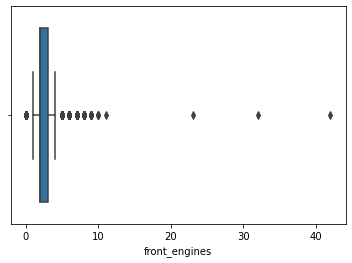

In [35]:
sns.boxplot(data = df, x = 'front_engines')

 - Have some crazy outliers with 3 accidents having over 20 engines

<AxesSubplot:xlabel='railcar_quantity'>

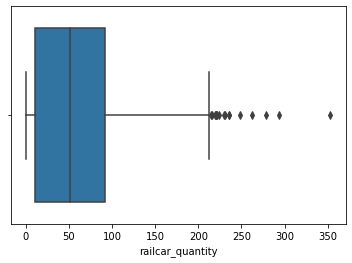

In [36]:
sns.boxplot(data=df, x = 'railcar_quantity')

- majority of railcar quanity is between 0-100 cars but there are some outliers above 200 with one coming in at a whopping 350 cars

<AxesSubplot:xlabel='train_speed'>

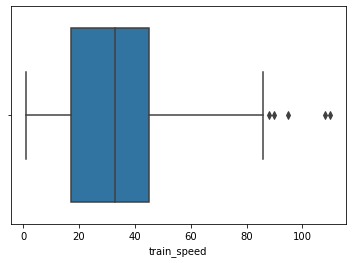

In [37]:
sns.boxplot(data = df, x = 'train_speed')

- train speed outliers above 80 mph, with 2 over 100 mph

<AxesSubplot:xlabel='temp'>

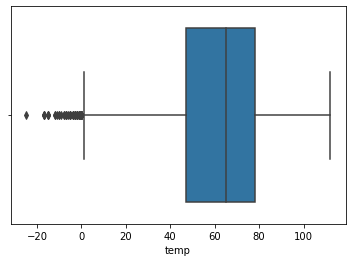

In [39]:
sns.boxplot(data = df, x = 'temp')

- outliers exist for accidents where temp was below 0 degrees with 1 occuring where temp was greater than -20